<a href="https://colab.research.google.com/github/EvgenyEsin/Python_libraries_for_DS/blob/main/Python_libraries_for_DS_DZ_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 6

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.


1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

##Задание 1

**Анализ Переобучения и Недообучения**

- Создайте две модели: модель линейной регрессии и модель полиномиальной регрессии высокой степени, используя один и тот же набор данных. Обучите эти модели, затем оцените их производительность на тренировочном и тестовом наборах данных.
- Какая модель показывает признаки переобучения, а какая - признаки недообучения?
- Какие выводы можно сделать о влиянии сложности модели на её способность к обобщению


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [2]:
from sklearn.datasets import load_iris

# Загружаем набор данных Iris
iris = load_iris()

# Преобразуем данные в DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Добавляем целевую переменную
iris_df['target'] = iris.target




In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
iris_df.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [6]:
iris_df['target'].value_counts()

,count
target,
0,50
1,50
2,50


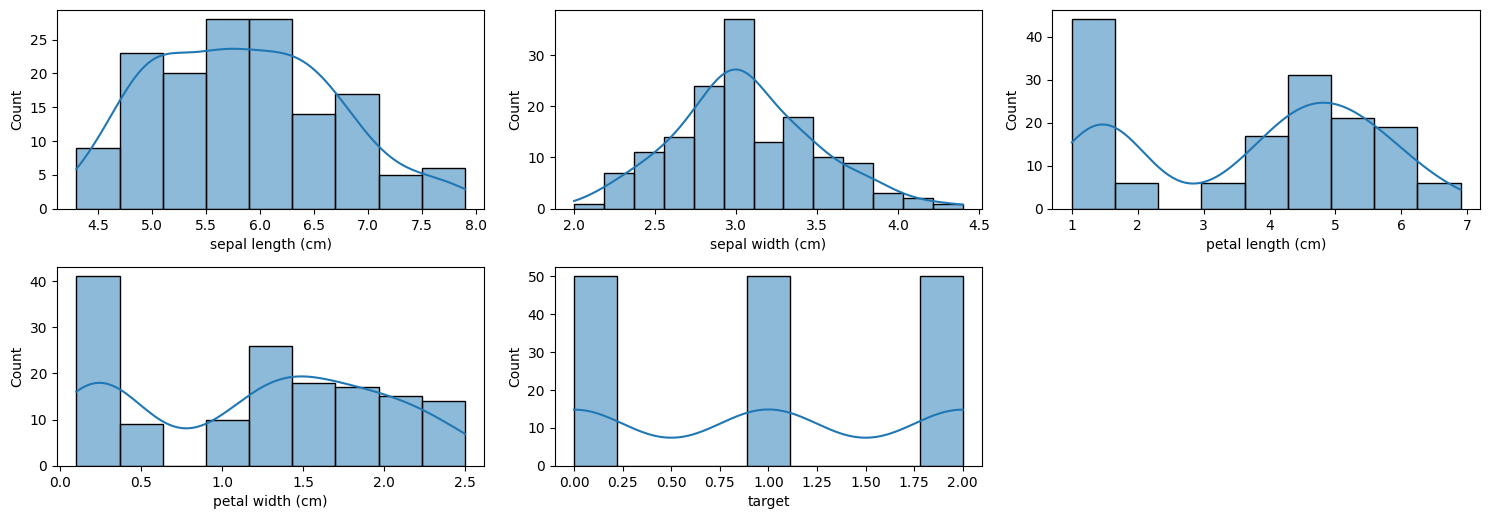

In [7]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

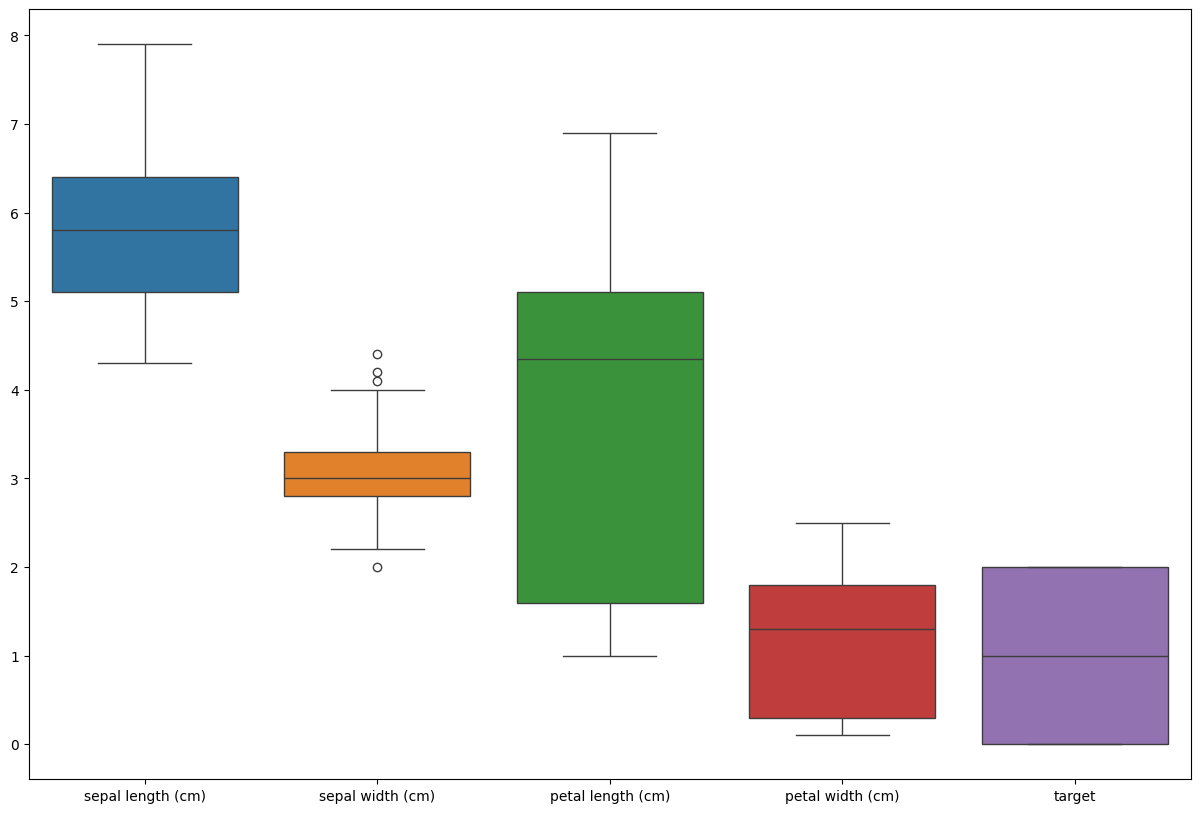

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= iris_df, ax=ax)
plt.show()

In [9]:
iris_df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [10]:
X = iris_df.drop('target', axis=1)
Y = iris_df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [11]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [12]:
X = iris_df.drop('target', axis=1)
Y = iris_df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)


# Создание и обучение модели логистической регрессии
lg = LogisticRegression(class_weight='balanced', max_iter=200)
lg.fit(X_scaled, Y)


# После обучения модели можно получить коэффициенты\
lg.coef_


array([[-1.07404149,  1.16006342, -1.93062866, -1.81168873],
       [ 0.58780051, -0.36182377, -0.36346274, -0.82619289],
       [ 0.48624098, -0.79823965,  2.2940914 ,  2.63788161]])

In [13]:
feature_names = X.columns
coefficients = lg.coef_  # lg.coef_ возвращает массив в массиве, если модель обучена на двухмерном X

# Связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# Преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# Отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

sepal length (cm): [-1.07404149  1.16006342 -1.93062866 -1.81168873]
sepal width (cm): [ 0.58780051 -0.36182377 -0.36346274 -0.82619289]
petal length (cm): [ 0.48624098 -0.79823965  2.2940914   2.63788161]





1. **Коэффициенты для каждого класса**:  модель логистической регрессии обучается на три класса (в данном случае три вида ирисов). Каждый класс имеет свой набор коэффициентов, которые показывают, как каждый признак влияет на вероятность принадлежности к этому классу.

2. **Значение коэффициентов**:
   - **Положительные коэффициенты**: Увеличивают вероятность принадлежности к классу. Если признак увеличивается, то вероятность принадлежности к этому классу также увеличивается.
   - **Отрицательные коэффициенты**: Уменьшают вероятность принадлежности к классу. Если признак увеличивается, то вероятность принадлежности к этому классу уменьшается.



In [14]:

accuracy_test = accuracy_score(y_test, lg.predict(X_test))
#Y_pred_test_lg = lg.predict(X_test)


accuracy_train = accuracy_score(y_train, lg.predict(X_train))
#Y_pred_train_lg = lg.predict(X_train)

print("Логистическая регрессия:")
print("Тренировочный accuracy:", accuracy_train)
print("Тестовый accuracy:", accuracy_test)

Логистическая регрессия:
Тренировочный accuracy: 0.9666666666666667
Тестовый accuracy: 1.0


Модель склонна к переобучению.

##Задание 2

Реализация Кросс-Валидации

 -   Реализуйте процесс 5-кратной кросс-валидации для модели полиномиальной линейной регрессии, используя предоставленный набор данных.
 -  	Как изменяется средняя точность модели с использованием кросс-валидации по сравнению с однократной оценкой?
 - 	Объясните, почему кросс-валидация может дать более надежную оценку эффективности модели.

Вопросы к заданию:
- Каковы преимущества использования кросс-валидации перед оценкой на одном разделении?
- Как 10-кратная кросс-валидация может влиять на результаты по сравнению с 5-кратной?



In [15]:
# Однократная оценка на тестовых данных
single_score = accuracy_score(y_test, lg.predict(X_test))
print("Однократная оценка эффективности (accuracy):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(lg, X, Y, cv=5, scoring='accuracy')
print("Среднее значение accuracy по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(lg, X, Y, cv=10, scoring='accuracy')
print("Среднее значение accuracy при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (accuracy): 1.0
Среднее значение accuracy по 5-кратной кросс-валидации: 0.9733333333333334
Среднее значение accuracy при 10-кратной кросс-валидации: 0.9733333333333334


1. Переобучение: Однократная оценка accuracy = 1
  указывает на сильное переобучение модели на тестовых данных. Это означает, что модель идеально подстроилась под тестовые данные, но не обязательно будет хорошо работать на новых данных.

2. Различия в выборках: Кросс-валидация позволяет оценить модель на различных подвыборках данных, что дает более реалистичное представление о генерализации модели. Каждая итерация в процессе кросс-валидации использует разные наборы тренировочных и проверочных данных, что может выявить переобучение или недообучение модели, не видимое при однократном тестировании.

Сравнивая среднюю точность модели через кросс-валидацию с однократной оценкой, становится видно, что результат однократной оценки значительно выше (accuracy = 1.0), что может свидетельствовать о переобучении модели на конкретном наборе данных. Когда модель тестируется только на одном разделении данных, оценка может не отражать реальную способность модели к обобщению на новые данные.
Кросс-валидация дает более надежную оценку эффективности модели, потому что она включает многократное тестирование модели на разных подвыборках данных. Это минимизирует влияние случайных подмножеств данных на результаты и позволяет лучше оценить, насколько хорошо модель сможет работать на невиданной ранее информации. По сути, это имитирует процесс "нового встречания" модели с данными и подчеркивает её устойчивость к изменениям в данных.



##Задание 3

 Эксперименты с Регуляризацией

- Добавьте L1 и L2 регуляризацию к вашей модели линейной регрессии. Экспериментируйте с различными значениями параметра регуляризации и оцените влияние каждого типа регуляризации на качество модели на тестовой выборке.
- Как регуляризация влияет на коэффициенты модели?
Объясните, почему L1-регуляризация может быть использована для отбора признаков.

Вопросы к заданию:
- Как определить оптимальное значение параметра регуляризации?
- Почему L2-регуляризация не приводит к отбору признаков так же, как L1?


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression


# Параметры регуляризации для тестирования
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]



for alpha in alphas:
    # Логистическая регрессия с L1 регуляризацией
    logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha)  # 'liblinear' поддерживает L1
    logistic_l1.fit(X_train, y_train)
    y_pred_l1 = logistic_l1.predict(X_test)
    print(f'L1 Regularization Accuracy с alpha={alpha}: {accuracy_score(y_test, y_pred_l1)}')

for alpha in alphas:
    # Логистическая регрессия с L2 регуляризацией
    logistic_l2 = LogisticRegression(penalty='l2', C=1/alpha)  # По умолчанию 'l2'
    logistic_l2.fit(X_train, y_train)
    y_pred_l2 = logistic_l2.predict(X_test)
    print(f'L2 Regularization Accuracy с alpha={alpha}: {accuracy_score(y_test, y_pred_l2)}')

L1 Regularization Accuracy с alpha=0.01: 1.0
L1 Regularization Accuracy с alpha=0.1: 1.0
L1 Regularization Accuracy с alpha=1.0: 0.9666666666666667
L1 Regularization Accuracy с alpha=10.0: 0.9333333333333333
L1 Regularization Accuracy с alpha=100.0: 0.3333333333333333
L2 Regularization Accuracy с alpha=0.01: 1.0
L2 Regularization Accuracy с alpha=0.1: 1.0
L2 Regularization Accuracy с alpha=1.0: 1.0
L2 Regularization Accuracy с alpha=10.0: 0.9666666666666667
L2 Regularization Accuracy с alpha=100.0: 0.9333333333333333


Анализ результатов показывает, что модель L1 с параметром alpha 1 дает наилучший результат с accuracy
 около 0.97, что указывает на достаточно хорошую адекватность модели к данным. С увеличением альфа значение accuracy немного уменьшается

Для модели L2 значение accuracy  достигает наилучшего результата 0.97 при alpha 10.


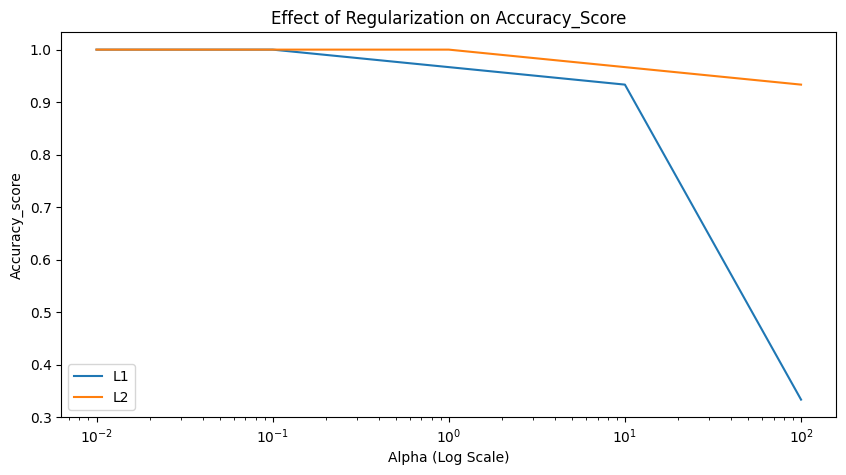

In [17]:
import matplotlib.pyplot as plt

# Переопределим данные для создания графиков
accuracy_score_l1 = []
accuracy_score_l2 = []

# Тестируем Lasso регрессию и Ridge регрессию, сохраняем результаты R^2
for alpha in alphas:
    # Логистическая регрессия с L1 регуляризацией
    logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha)  # 'liblinear' поддерживает L1
    logistic_l1.fit(X_train, y_train)
    y_pred_l1 = logistic_l1.predict(X_test)
    accuracy_score_l1.append(accuracy_score(y_test, y_pred_l1))

for alpha in alphas:
    # Логистическая регрессия с L2 регуляризацией
    logistic_l2 = LogisticRegression(penalty='l2', C=1/alpha)  # По умолчанию 'l2'
    logistic_l2.fit(X_train, y_train)
    y_pred_l2 = logistic_l2.predict(X_test)

    accuracy_score_l2.append(accuracy_score(y_test, y_pred_l2))

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(alphas, accuracy_score_l1, label='L1')
plt.plot(alphas, accuracy_score_l2, label='L2')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Accuracy_score')
plt.title('Effect of Regularization on Accuracy_Score')
plt.legend()
plt.show()


## Задание 4

Анализ способности к обобщению

- Постройте графики кривых обучения для вашей модели линейной регрессии, отображая ошибки на тренировочной и валидационной выборке в зависимости от размера обучающей выборки.
- Что можно сказать о способности модели к обобщению, основываясь на этих графиках?
Какие шаги можно предпринять, если график указывает на переобучение или недообучение модели?

Вопросы к заданию:
- Какие факторы могут привести к переобучению модели, согласно графику кривой обучения?
- Какие методы могут помочь улучшить способность модели к обобщению?


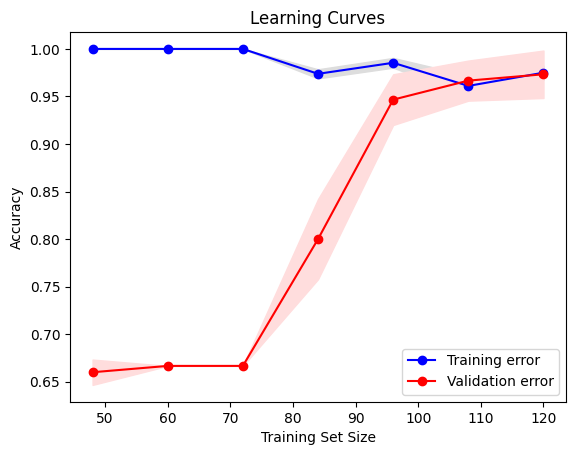

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Предполагается, что X и Y уже определены

# Создание модели логистической регрессии
model = LogisticRegression(max_iter=200)

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'  # Изменено на 'accuracy'
)

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')  # Изменено на 'Accuracy'
plt.legend()
plt.show()

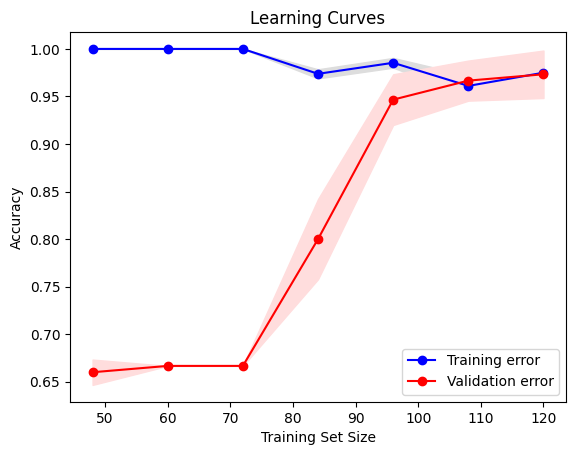

In [19]:
model2 = LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=200)
# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'  # Изменено на 'accuracy'
)

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')  # Изменено на 'Accuracy'
plt.legend()
plt.show()

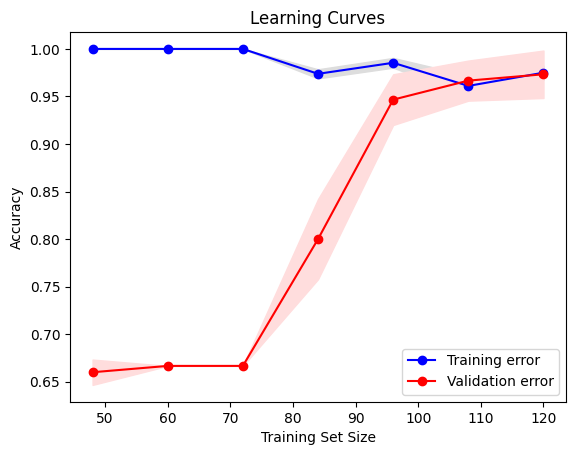

In [20]:
model3 = LogisticRegression(penalty='l2', solver='liblinear', C=1/10, max_iter=200)
# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'  # Изменено на 'accuracy'
)

# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')  # Изменено на 'Accuracy'
plt.legend()
plt.show()

Основные наблюдения:
1. Первоначальное поведение:
   - При малом размере обучающего набора (около 50-80), ошибка на валидационной выборке  высокая и начинает уменьшаться с увеличением набора данных.
   - Ошибка на обучающей выборке изначально низкая, что может свидетельствовать о переобучении на малых данных.

2. Сходимость ошибок:
   - Начиная с некоторого размера обучающего набора (примерно 110), ошибки на обучающей и валидационной выборках начинают сходиться.
   - Вполне возможно, что модель стабилизируется, как только достигается определенный объем данных.

3. Высокая дисперсия валидационной ошибки:
   - C увеличением  размера обучающей выборки  наблюдается высокая дисперсия валидационной ошибки, о чем свидетельствует широкая полоска вокруг красной линии. высокая дисперсия валидационной ошибки указывает на проблемы с обобщающей способностью модели
1. Недостаток данных:
   - На начальных этапах обучение на малых данных приводит к высокой ошибке на валидации и низкой ошибке на обучении, что свидетельствует о переобучении.
   
2. Объем данных имеет значение:
   - Модель начинает улучшаться по мере увеличения размера обучающего набора, что приводит к уменьшению разницы между ошибкой на обучении и валидацией.
   - Достигнув определенного объема (примерно 110 и более), ошибки становятся стабильными и равными, наблюдается высокая дисперсия валидационной ошибки,.




Шаги при переобучении или недообучении:
- Переобучение: Добавить больше данных, использовать регуляризацию (L1, L2), уменьшить число признаков.
- Недообучение: Увеличить число признаков (если возможно), уменьшить степень регуляризации, использовать более сложные модели.

Факторы, приводящие к переобучению:
- Маленький объем тренировочных данных.
- Слишком сложная модель для данного объема данных.
- Неиспользование регуляризации.

Методы улучшения обобщения:
- Кросс-валидация.
- Регуляризация (L1, L2).
- Увеличение размера тренировочного набора данных.